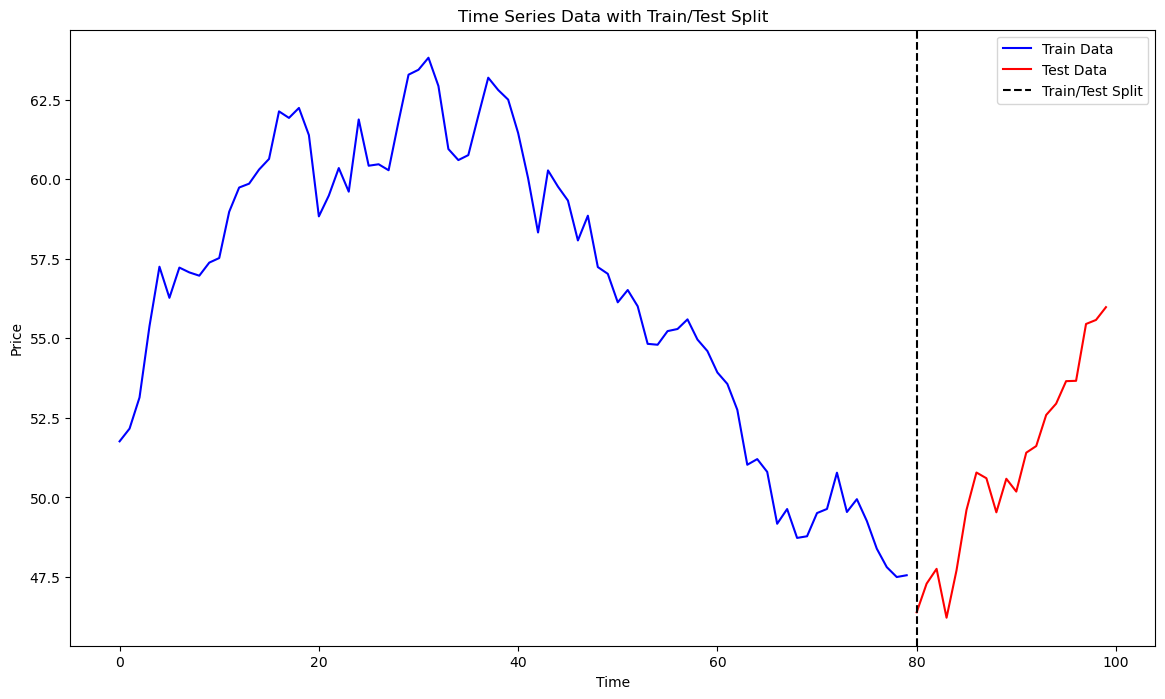

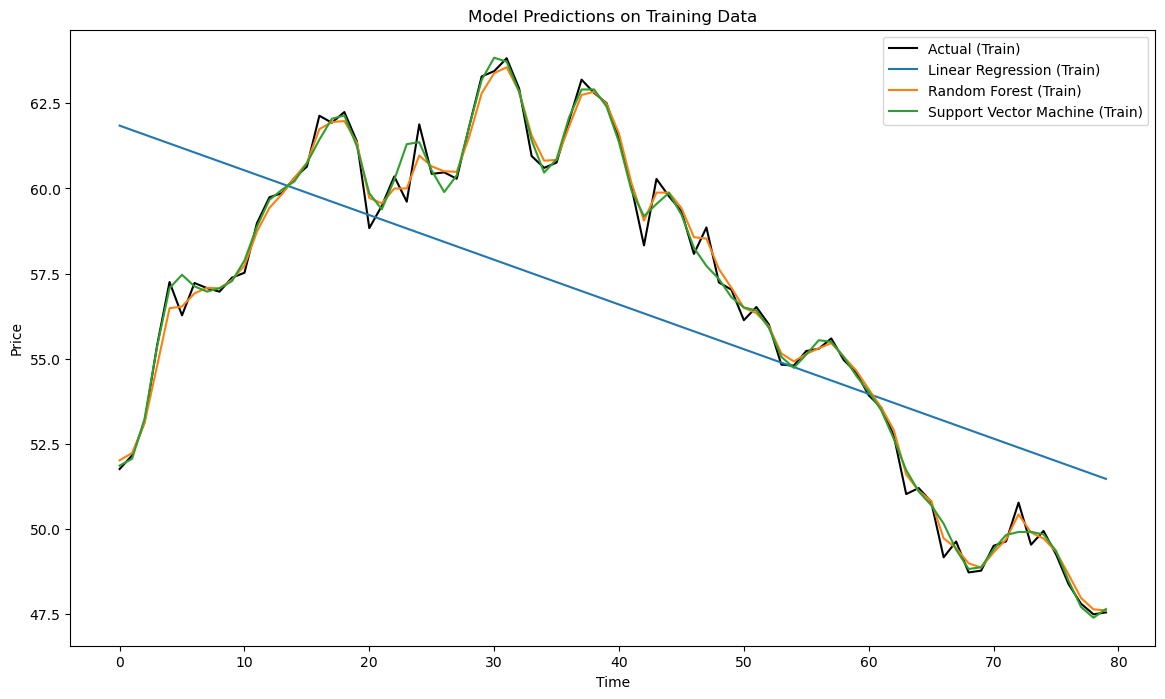

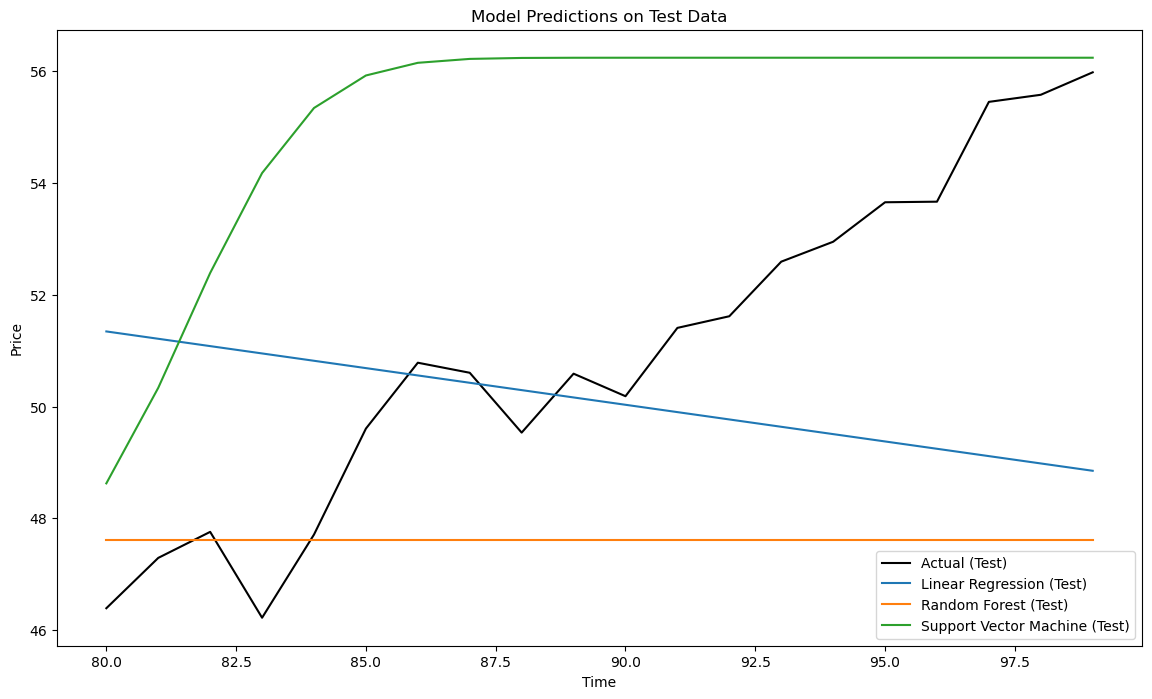

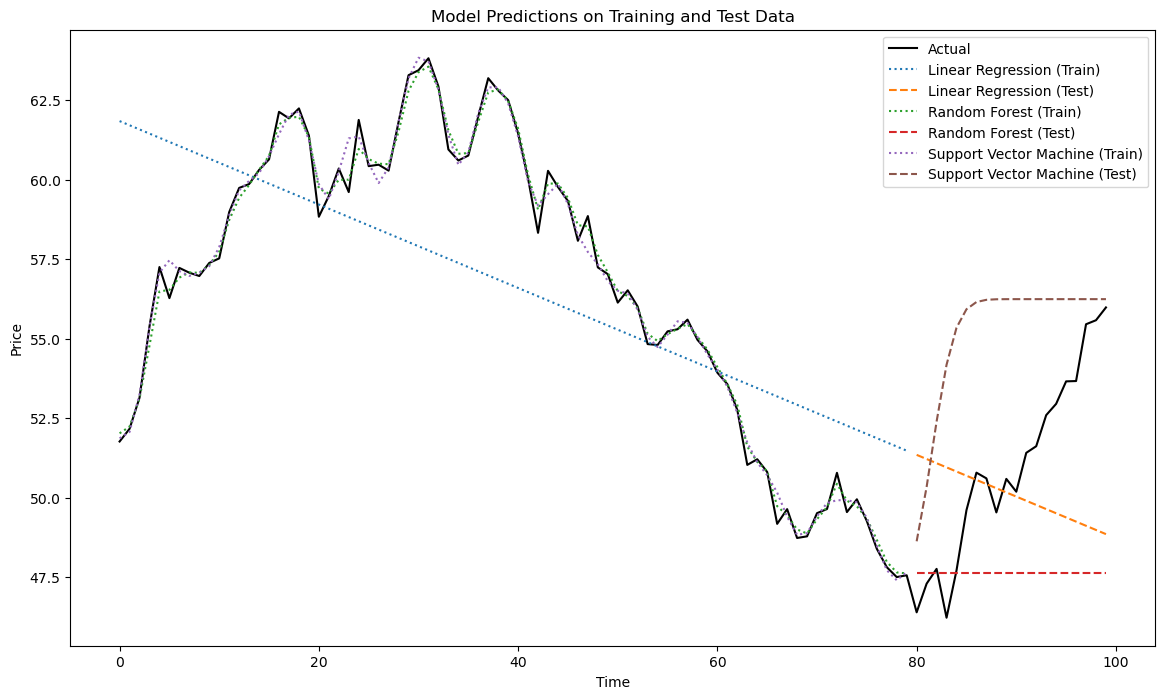

Mean Squared Error (MSE) for each model on Training Data:
Linear Regression: 13.0924
Random Forest: 0.0948
Support Vector Machine: 0.1613

Mean Squared Error (MSE) for each model on Test Data:
Linear Regression: 14.1832
Random Forest: 19.8667
Support Vector Machine: 22.7251


In [24]:
# 단일 변수 모델 사용

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# 예제 시계열 데이터 생성
np.random.seed(0)
n = 100
time = np.arange(n)
price = np.cumsum(np.random.randn(n)) + 50

# 학습 데이터와 테스트 데이터 분할
split_point = int(n * 0.8)
time_train, time_test = time[:split_point], time[split_point:]
price_train, price_test = price[:split_point], price[split_point:]

# 시계열 데이터 그래프
plt.figure(figsize=(14, 8))
plt.plot(time_train, price_train, label='Train Data', color='blue')
plt.plot(time_test, price_test, label='Test Data', color='red')
plt.axvline(x=split_point, color='black', linestyle='--', label='Train/Test Split')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Time Series Data with Train/Test Split')
plt.legend()
plt.show()

# 모델 정의
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'Support Vector Machine': SVR(kernel='rbf', C=100, gamma=0.1)
}


# 모델 학습 및 예측
predictions_train = {}
predictions_test = {}
mse_scores_train = {}
mse_scores_test = {}
# 단일 변수 모델
for name, model in models.items():
    model.fit(time_train.reshape(-1, 1), price_train)
    predictions_train[name] = model.predict(time_train.reshape(-1, 1))
    predictions_test[name] = model.predict(time_test.reshape(-1, 1))
    mse_scores_train[name] = mean_squared_error(price_train, predictions_train[name])
    mse_scores_test[name] = mean_squared_error(price_test, predictions_test[name])


# 예측 결과 시각화 (학습 데이터)
plt.figure(figsize=(14, 8))
plt.plot(time_train, price_train, label='Actual (Train)', color='black')
for name, pred in predictions_train.items():
    plt.plot(time_train, pred, label=f'{name} (Train)')
plt.title('Model Predictions on Training Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# 예측 결과 시각화 (테스트 데이터)
plt.figure(figsize=(14, 8))
plt.plot(time_test, price_test, label='Actual (Test)', color='black')
for name, pred in predictions_test.items():
    plt.plot(time_test, pred, label=f'{name} (Test)')
plt.title('Model Predictions on Test Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# 학습 데이터와 테스트 데이터를 함께 비교
plt.figure(figsize=(14, 8))
plt.plot(time, price, label='Actual', color='black')
for name in models.keys():
    plt.plot(time_train, predictions_train[name], linestyle='dotted', label=f'{name} (Train)')
    plt.plot(time_test, predictions_test[name], linestyle='dashed', label=f'{name} (Test)')
plt.title('Model Predictions on Training and Test Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# MSE 출력
print("Mean Squared Error (MSE) for each model on Training Data:")
for name, mse in mse_scores_train.items():
    print(f'{name}: {mse:.4f}')

print("\nMean Squared Error (MSE) for each model on Test Data:")
for name, mse in mse_scores_test.items():
    print(f'{name}: {mse:.4f}')

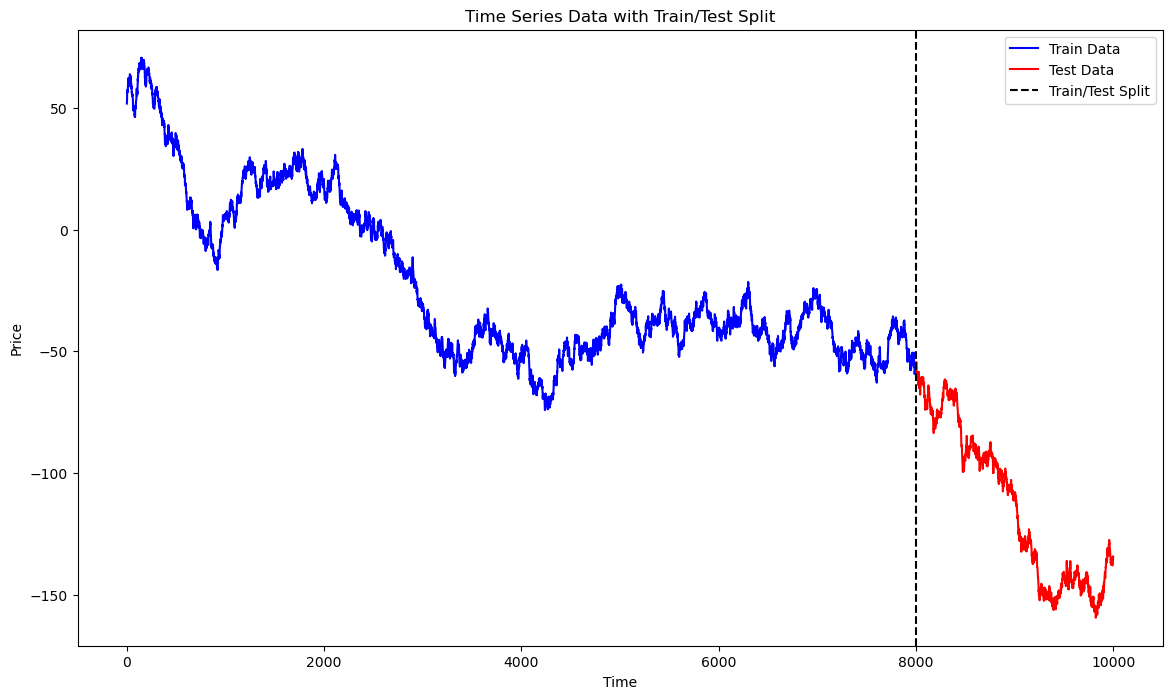

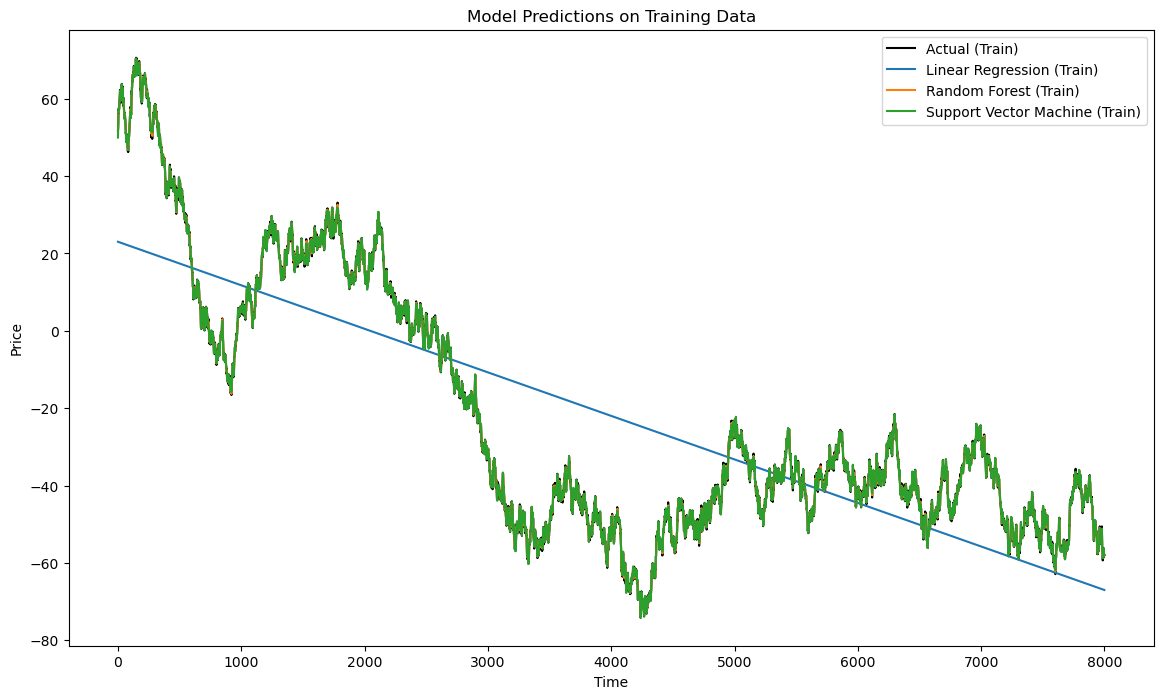

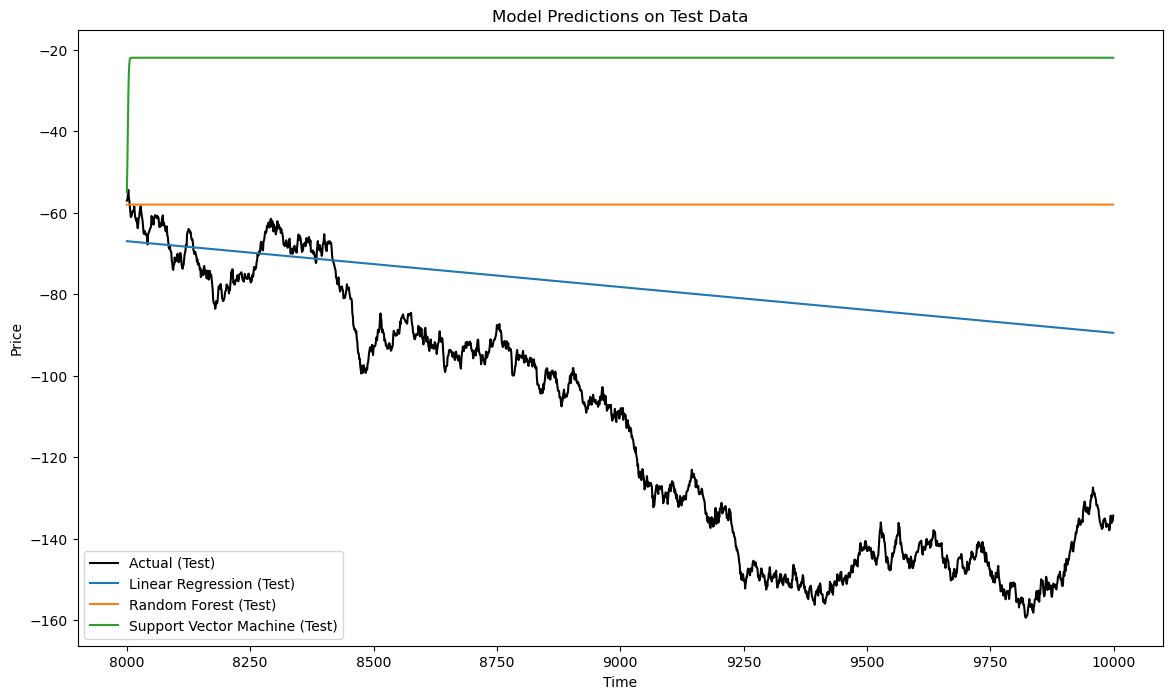

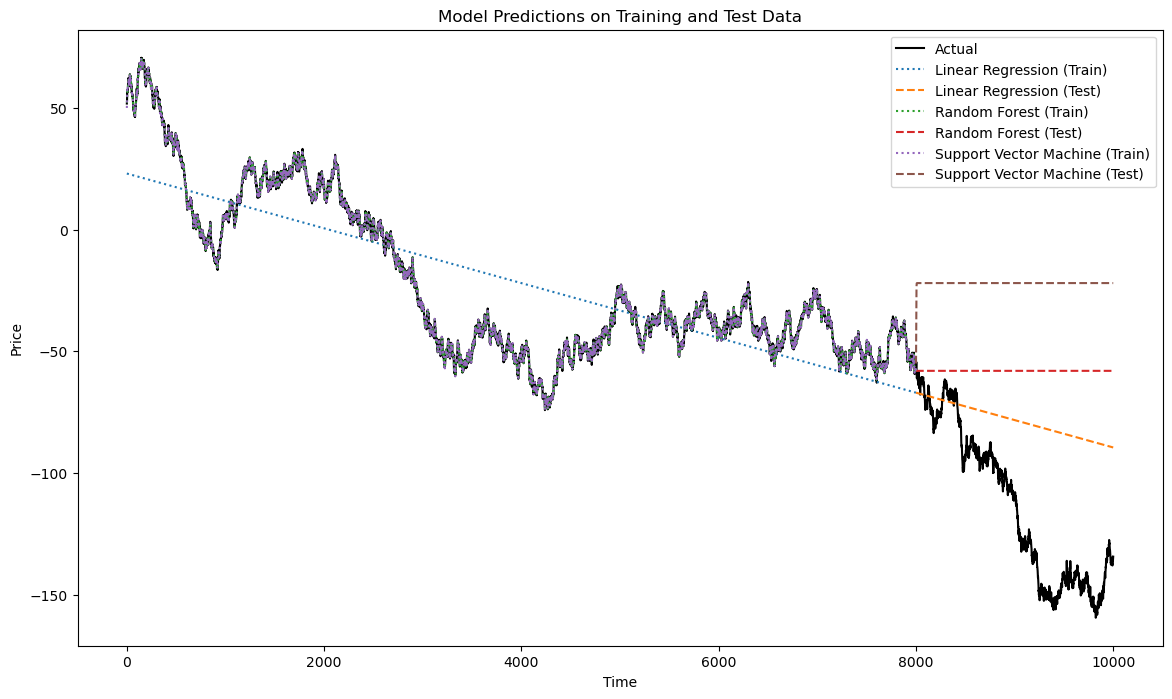

Mean Squared Error (MSE) for each model on Training Data:
Linear Regression: 415.0812
Random Forest: 0.0853
Support Vector Machine: 0.1720

Mean Squared Error (MSE) for each model on Test Data:
Linear Regression: 1875.5338
Random Forest: 4041.9587
Support Vector Machine: 9318.3074


In [21]:
# 데이터 100배 증가 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# 예제 시계열 데이터 생성
np.random.seed(0)
n = 10000
time = np.arange(n)
price = np.cumsum(np.random.randn(n)) + 50

# 학습 데이터와 테스트 데이터 분할
split_point = int(n * 0.8)
time_train, time_test = time[:split_point], time[split_point:]
price_train, price_test = price[:split_point], price[split_point:]

# 시계열 데이터 그래프
plt.figure(figsize=(14, 8))
plt.plot(time_train, price_train, label='Train Data', color='blue')
plt.plot(time_test, price_test, label='Test Data', color='red')
plt.axvline(x=split_point, color='black', linestyle='--', label='Train/Test Split')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Time Series Data with Train/Test Split')
plt.legend()
plt.show()

# 모델 정의
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'Support Vector Machine': SVR(kernel='rbf', C=100, gamma=0.1)
}

# 모델 학습 및 예측
predictions_train = {}
predictions_test = {}
mse_scores_train = {}
mse_scores_test = {}
for name, model in models.items():
    model.fit(time_train.reshape(-1, 1), price_train)
    predictions_train[name] = model.predict(time_train.reshape(-1, 1))
    predictions_test[name] = model.predict(time_test.reshape(-1, 1))
    mse_scores_train[name] = mean_squared_error(price_train, predictions_train[name])
    mse_scores_test[name] = mean_squared_error(price_test, predictions_test[name])

# 예측 결과 시각화 (학습 데이터)
plt.figure(figsize=(14, 8))
plt.plot(time_train, price_train, label='Actual (Train)', color='black')
for name, pred in predictions_train.items():
    plt.plot(time_train, pred, label=f'{name} (Train)')
plt.title('Model Predictions on Training Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# 예측 결과 시각화 (테스트 데이터)
plt.figure(figsize=(14, 8))
plt.plot(time_test, price_test, label='Actual (Test)', color='black')
for name, pred in predictions_test.items():
    plt.plot(time_test, pred, label=f'{name} (Test)')
plt.title('Model Predictions on Test Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# 학습 데이터와 테스트 데이터를 함께 비교
plt.figure(figsize=(14, 8))
plt.plot(time, price, label='Actual', color='black')
for name in models.keys():
    plt.plot(time_train, predictions_train[name], linestyle='dotted', label=f'{name} (Train)')
    plt.plot(time_test, predictions_test[name], linestyle='dashed', label=f'{name} (Test)')
plt.title('Model Predictions on Training and Test Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# MSE 출력
print("Mean Squared Error (MSE) for each model on Training Data:")
for name, mse in mse_scores_train.items():
    print(f'{name}: {mse:.4f}')

print("\nMean Squared Error (MSE) for each model on Test Data:")
for name, mse in mse_scores_test.items():
    print(f'{name}: {mse:.4f}')